# Overfitting, underfitting and regularization

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ML model
from sklearn.linear_model import RidgeClassifier

# Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV

# metrics
from sklearn.metrics import accuracy_score

## Toy example

Text(0, 0.5, 'label y')

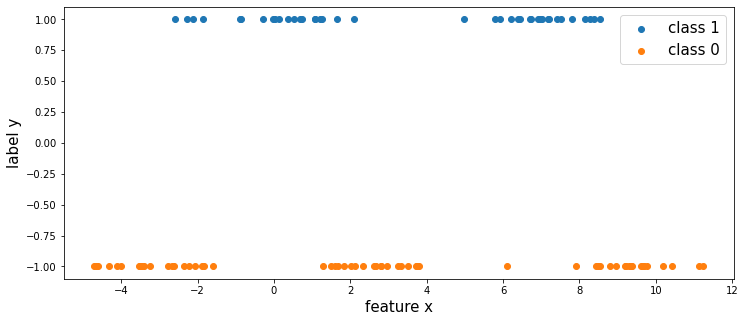

In [179]:
'toy dataset'
n = 100 # size of the dataset
y = np.zeros(n) # initialize y
X = np.zeros((n,1)) # initialize x

y[0:20] = 1
X[0:20] = np.random.randn(20,1)

y[20:40] = -1
X[20:40] = 3+np.random.randn(20,1)

y[40:60] = -1
X[40:60] =  -3+np.random.randn(20,1)

y[60:80] = 1
X[60:80] = 7+ np.random.randn(20,1)

y[80:100] = -1
X[80:100] = 10 + np.random.randn(20,1)

# plot toy dataset
fig, ax = plt.subplots(figsize=(12,5))

ax.scatter(X[y==1],y[y==1], label='class 1')
ax.scatter(X[y==-1],y[y==-1], label='class 0')
ax.legend(fontsize=15)
ax.set_xlabel('feature x', fontsize=15)
ax.set_ylabel('label y', fontsize=15)

In [180]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y)

## Underfitting

Let's train a Ridge classifier model

In [181]:
ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train,y_train)

RidgeClassifier()

In [182]:
y_train_pred = ridge_clf.predict(X_train)
y_test_pred = ridge_clf.predict(X_test)

In [183]:
# accuracy on training set
accuracy_score(y_train,y_train_pred)

0.6

In [184]:
# accuracy on testing set
accuracy_score(y_test,y_test_pred)

0.6

The model is **underfitting** the data.

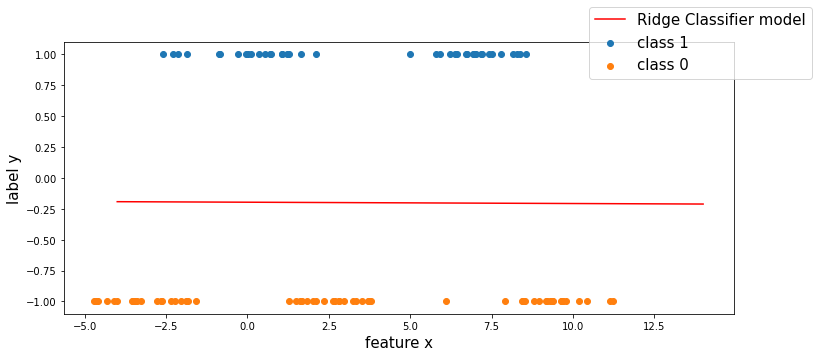

In [185]:
# plot toy dataset
fig, ax = plt.subplots(figsize=(12,5))

ax.scatter(X[y==1],y[y==1], label='class 1')
ax.scatter(X[y==-1],y[y==-1], label='class 0')
ax.set_xlabel('feature x', fontsize=15)
ax.set_ylabel('label y', fontsize=15)

# plot logistic regression model 
X_plot = np.linspace(-4,14,100).reshape(100,1)
y_plot = ridge_clf.decision_function(X_plot) # equivalent to logistic regression 'predict_proba'
ax.plot(X_plot,y_plot,c='r', label='Ridge Classifier model')

fig.legend(fontsize=15)

## Overfitting

Let us add polynomial features to our model

In [192]:
# pipeline: polynomial features + scaling + logistic regression model
pipe = Pipeline(steps = [
    ('poly_features', PolynomialFeatures(degree=75)),
    ('scaler', StandardScaler()),
    ('clf', RidgeClassifier(alpha=0)) # alpha is the regularization parameter
])

In [193]:
pipe.fit(X_train,y_train)

C:\Users\javier.perez-alvaro\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=75)),
                ('scaler', StandardScaler()),
                ('clf', RidgeClassifier(alpha=0))])

In [194]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [195]:
# accuracy on training set
accuracy_score(y_train,y_train_pred)

0.8666666666666667

In [196]:
# accuracy on testing set
accuracy_score(y_test,y_test_pred)

0.88

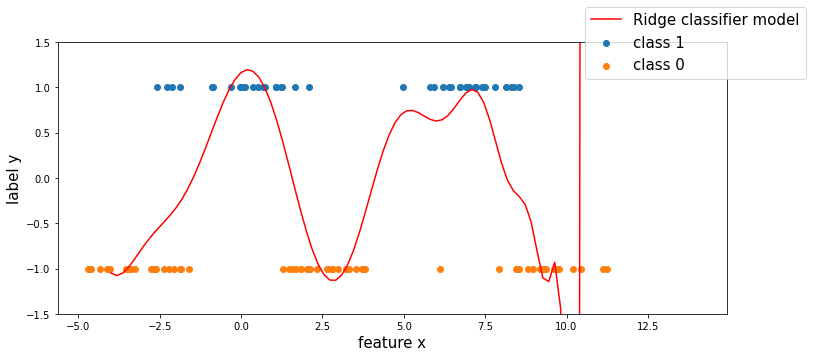

In [197]:
# plot toy dataset
fig, ax = plt.subplots(figsize=(12,5))

ax.scatter(X[y==1],y[y==1], label='class 1')
ax.scatter(X[y==-1],y[y==-1], label='class 0')
ax.set_xlabel('feature x', fontsize=15)
ax.set_ylabel('label y', fontsize=15)
ax.set_ylim([-1.5,1.5])

# plot model 
X_plot = np.linspace(-4,14,100).reshape(100,1)
y_plot = pipe.decision_function(X_plot)
ax.plot(X_plot,y_plot,c='r', label='Ridge classifier model')

fig.legend(fontsize=15)

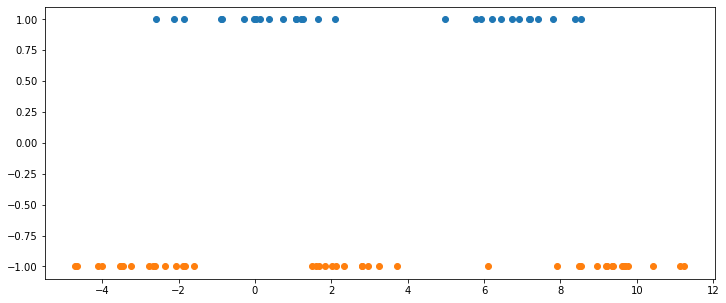

In [198]:
fig, ax = plt.subplots(figsize=(12,5))

ax.scatter(X_train[y_train==1],y_train[y_train==1], label='class 1')
ax.scatter(X_train[y_train==-1],y_train[y_train==-1], label='class 0')

In [ ]:
param_dic = {'poly_features__degree' : list(range(1,50))}

In [ ]:
grid = GridSearchCV(pipe, parameters_grid, cv=10, scoring='accuracy')
grid.fit(x,y)

In [ ]:
# view the results
grid_results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]
grid_results

In [ ]:
grid_results.mean_test_score.plot(figsize=(12,5))

In [ ]:
# pipeline with fixed degree
pipe = Pipeline(steps = [
    ('poly_features', PolynomialFeatures(degree=24)),
    ('clf', RidgeClassifier())
])

In [ ]:
# regularization parameter
parameters_grid = {'clf__alpha' : [0,0.01,0.1,1,10,100,1000]}

In [ ]:
grid = GridSearchCV(pipe, parameters_grid, cv=10, scoring='accuracy')
grid.fit(x,y)

In [ ]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]